In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, OneHotEncoder
from outlier_cleaner import OutlierCleaner
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer

# modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,precision_score,roc_curve,roc_auc_score,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

import outlier_cleaner
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [106]:
# ! pip install --upgrade outlier-cleaner

In [107]:
outlier_cleaner.__version__

'0.1.0'

In [109]:
df = pd.read_csv('./imdb_data.csv')
df

,Title,Title_URL,Image,listeritemimage_URL,listeritemindex,Year,certificate,Time,genre,Rating,Score,Synopsis,Content,Director,Content4,Content6,Content8,Content10,Votes,Gross
0,Avatar: The Way of Water,https://www.imdb.com/title/tt1630029/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BYjhiNj...,https://www.imdb.com/title/tt1630029/?ref_=adv...,1.,(2022),12A,192 min,"\nAction, Adventure, Fantasy",7.8,\n67 \n Metascore\n,\nJake Sully lives with his newfound family fo...,\n Director:\nJames Cameron\n ...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,"280,707",NaN
1,The Menu,https://www.imdb.com/title/tt9764362/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BMzdjNj...,https://www.imdb.com/title/tt9764362/?ref_=adv...,2.,(2022),15,107 min,"\nHorror, Thriller",7.2,\n71 \n Metascore\n,\nA young couple travels to a remote island to...,\n Director:\nMark Mylod\n ...,Mark Mylod,Ralph Fiennes,Anya Taylor-Joy,Nicholas Hoult,Hong Chau,"211,749",NaN
2,Babylon,https://www.imdb.com/title/tt10640346/?ref_=ad...,https://m.media-amazon.com/images/M/MV5BNjlkYj...,https://www.imdb.com/title/tt10640346/?ref_=ad...,3.,(I) (2022),18,189 min,"\nComedy, Drama, History",7.5,\n60 \n Metascore\n,\nA tale of outsized ambition and outrageous e...,\n Director:\nDamien Chazelle\n ...,Damien Chazelle,Brad Pitt,Margot Robbie,Jean Smart,Olivia Wilde,"47,754",NaN
3,Everything Everywhere All at Once,https://www.imdb.com/title/tt6710474/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt6710474/?ref_=adv...,4.,(2022),15,139 min,"\nAction, Adventure, Comedy",8.0,\n81 \n Metascore\n,\nA middle-aged Chinese immigrant is swept up ...,"\n Directors:\nDan Kwan, \nDaniel Scheinert...",Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,"315,971",NaN
4,M3gan,https://www.imdb.com/title/tt8760708/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt8760708/?ref_=adv...,5.,(2022),15,102 min,"\nHorror, Sci-Fi, Thriller",6.4,\n72 \n Metascore\n,\nA robotics engineer at a toy company builds ...,\n Director:\nGerard Johnstone\n ...,Gerard Johnstone,Allison Williams,Violet McGraw,Ronny Chieng,Amie Donald,"52,436",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79989,Nanga Parbat,https://www.imdb.com/title/tt1361349/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt1361349/?ref_=adv...,"39,996.",(2010),NaN,104 min,"\nBiography, Drama",6.4,NaN,\nDrama about the tragic Nanga Parbat expediti...,\n Director:\nJoseph Vilsmaier\n ...,Joseph Vilsmaier,Florian Stetter,Andreas Tobias,Karl Markovics,Steffen Schroeder,"1,876",NaN
79990,When Men Carried Clubs and Women Played Ding-Dong,https://www.imdb.com/title/tt0067638/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt0067638/?ref_=adv...,"39,997.",(1971),NaN,95 min,\nComedy,4.1,NaN,\nPrehistoric cave-stud Ari wins lovely virgin...,\n Director:\nBruno Corbucci\n ...,Bruno Corbucci,Antonio Sabato,Aldo Giuffrè,Vittorio Caprioli,Nadia Cassini,177,NaN
79991,The Bacon Hair,https://www.imdb.com/title/tt13634096/?ref_=ad...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt13634096/?ref_=ad...,"39,998.",(2020),NaN,76 min,"\nAnimation, Action, Adventure",8.0,NaN,\nSurrounded by towering walls and patrolled b...,\n Director:\nObliviousHD\n ...,ObliviousHD,Leah Ashley,Tom Aglio,Gen Sherard,Graham Rowat,119,NaN
79992,Alexander the Great,https://www.imdb.com/title/tt0081148/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt0081148/?ref_=adv...,"39,999.",(1980),12,210 min,"\nDrama, History",7.5,NaN,\nA rebel leader calling himself Alexander the...,\n Director:\nTheodoros Angelopoulos\n ...,Theodoros Angelopoulos,Omero Antonutti,Eva Kotamanidou,Mihalis Giannatos,Grigoris Evangelatos,"1,051",NaN


## Cleaning Data

In [112]:
df.duplicated().sum()

39996

In [113]:
df = df.drop_duplicates()

In [114]:
df.duplicated().sum()

0

In [115]:
df.isna().sum()

Title                      0
Title_URL                  0
Image                      0
listeritemimage_URL        0
listeritemindex            0
Year                    1342
certificate            12630
Time                    2579
genre                    204
Rating                  2620
Score                  26576
Synopsis                   0
Content                    1
Director                 116
Content4                 419
Content6                 707
Content8                 966
Content10               1262
Votes                   2620
Gross                  27804
dtype: int64

In [116]:
# drop columns

In [117]:
cols_to_drop = ['Title_URL', 'Image', 'listeritemimage_URL', 'listeritemindex', 'Score', 'Content', 'Content8',
                'Content10', 'Director', ]
df = df.drop(columns=cols_to_drop)

In [118]:
# filling na

In [119]:
df['certificate'] = df['certificate'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Time'] = df['Time'].fillna(df['Rating'].median())
df['Votes'] = df['Votes'].fillna('0')
df['Gross'] = df['Gross'].fillna('0')
df['Content4'] = df['Content4'].fillna('Unknown')
df['Content6'] = df['Content6'].fillna('Unknown')

In [120]:
# droping na

In [121]:
df = df.dropna(subset='Year',axis=0)

In [122]:
df.isna().sum()

Title          0
Year           0
certificate    0
Time           0
genre          0
Rating         0
Synopsis       0
Content4       0
Content6       0
Votes          0
Gross          0
dtype: int64

In [123]:
df.head()

,Title,Year,certificate,Time,genre,Rating,Synopsis,Content4,Content6,Votes,Gross
0,Avatar: The Way of Water,(2022),12A,192 min,"\nAction, Adventure, Fantasy",7.8,\nJake Sully lives with his newfound family fo...,Sam Worthington,Zoe Saldana,"280,707",0
1,The Menu,(2022),15,107 min,"\nHorror, Thriller",7.2,\nA young couple travels to a remote island to...,Ralph Fiennes,Anya Taylor-Joy,"211,749",0
2,Babylon,(I) (2022),18,189 min,"\nComedy, Drama, History",7.5,\nA tale of outsized ambition and outrageous e...,Brad Pitt,Margot Robbie,"47,754",0
3,Everything Everywhere All at Once,(2022),15,139 min,"\nAction, Adventure, Comedy",8.0,\nA middle-aged Chinese immigrant is swept up ...,Daniel Scheinert,Michelle Yeoh,"315,971",0
4,M3gan,(2022),15,102 min,"\nHorror, Sci-Fi, Thriller",6.4,\nA robotics engineer at a toy company builds ...,Allison Williams,Violet McGraw,"52,436",0


In [124]:
# regex text cleaning

In [125]:
df['Time'] = df['Time'].str.strip()

In [126]:
df['Time'] = df['Time'].str.replace(r'\s*min\s*','',regex=True)

In [127]:
df['Time'].unique()

array(['192', '107', '189', '139', '102', '114', '146', '117', '140',
       '128', '147', '151', '158', '100', '148', '126', '134', '130',
       '108', '104', '105', '98', '129', '127', '159', '123', '162',
       '125', '119', '173', '109', '111', '187', '161', '106', '112',
       '176', '167', '124', '175', '103', '137', '83', '136', '169',
       '115', '142', '94', '92', '195', '152', '110', '84', '155', '194',
       '180', nan, '135', '88', '154', '131', '101', '90', '97', '138',
       '120', '118', '95', '96', '132', '113', '153', '93', '181', '150',
       '170', '178', '122', '164', '116', '144', '121', '86', '145',
       '163', '89', '99', '165', '91', '149', '133', '202', '157', '201',
       '179', '156', '80', '143', '160', '168', '209', '79', '87', '85',
       '141', '242', '229', '172', '81', '183', '218', '238', '166',
       '210', '188', '82', '71', '207', '78', '185', '70', '76', '212',
       '77', '193', '220', '75', '50', '191', '197', '174', '73', '259',
  

In [128]:
df['Time'] = df['Time'].str.replace(',','')

In [129]:
df['Time'] = df['Time'].fillna(df['Rating'].median())

In [130]:
df['Time'] = df['Time'].astype(int)

In [131]:
df['Time'] = df['Time'].replace('0',df['Time'].mean())

In [132]:
df['Time'].unique()

array([ 192,  107,  189,  139,  102,  114,  146,  117,  140,  128,  147,
        151,  158,  100,  148,  126,  134,  130,  108,  104,  105,   98,
        129,  127,  159,  123,  162,  125,  119,  173,  109,  111,  187,
        161,  106,  112,  176,  167,  124,  175,  103,  137,   83,  136,
        169,  115,  142,   94,   92,  195,  152,  110,   84,  155,  194,
        180,    6,  135,   88,  154,  131,  101,   90,   97,  138,  120,
        118,   95,   96,  132,  113,  153,   93,  181,  150,  170,  178,
        122,  164,  116,  144,  121,   86,  145,  163,   89,   99,  165,
         91,  149,  133,  202,  157,  201,  179,  156,   80,  143,  160,
        168,  209,   79,   87,   85,  141,  242,  229,  172,   81,  183,
        218,  238,  166,  210,  188,   82,   71,  207,   78,  185,   70,
         76,  212,   77,  193,  220,   75,   50,  191,  197,  174,   73,
        259,  171,   74,  182,   57,  177,  219,   69,   64,   72,   59,
         58,  247,  321,  317,   60,   63,  186,  1

In [133]:
df['Time'].info()

<class 'pandas.core.series.Series'>
Index: 38656 entries, 0 to 39997
Series name: Time
Non-Null Count  Dtype
--------------  -----
38656 non-null  int32
dtypes: int32(1)
memory usage: 453.0 KB


In [134]:
df.Time.describe()

count    38656.000000
mean        99.982797
std         28.543952
min          6.000000
25%         90.000000
50%         98.000000
75%        111.000000
max       1260.000000
Name: Time, dtype: float64

In [135]:
df['Year'] = df['Year'].str.replace(r'\([IVXLCDM]+\)', '', regex=True)

In [136]:
df['Year'] = df['Year'].str.extract(r'(\d{4})')

In [137]:
df = df.dropna(subset='Year',axis=0)

In [138]:
df['Year'] = df['Year'].astype(int)

In [139]:
df['Year'].unique()

array([2022, 2023, 2019, 2009, 1986, 1972, 2014, 1994, 1993, 2001, 1978,
       2021, 1997, 2013, 2015, 2008, 1985, 2011, 2000, 1988, 2018, 2010,
       1999, 2020, 1995, 2017, 2012, 1981, 1957, 1990, 1996, 2006, 2016,
       1991, 1979, 1977, 1974, 1963, 2005, 2007, 1984, 2003, 1976, 1980,
       2004, 1983, 1987, 1998, 1982, 1992, 2002, 1969, 1971, 1966, 1930,
       1946, 1989, 1975, 1968, 1959, 2024, 1973, 1939, 2026, 1942, 1947,
       1965, 1960, 1962, 1967, 2025, 1964, 1970, 1954, 1935, 1941, 1961,
       1952, 1958, 1953, 1927, 1950, 1948, 1922, 1940, 1956, 1936, 1937,
       1931, 1949, 1944, 1951, 1933, 1955, 1934, 1932, 1920, 2027, 1925,
       1943, 2028, 1938, 1915, 1928, 1945, 1921, 1926, 1929, 1924, 1916,
       1923, 1919, 1918, 1917, 1914, 1911, 1913])

In [141]:
df['genre'] = df['genre'].str.strip()

In [142]:
df['genre_list'] = df['genre'].str.split(', ')

In [143]:
first_genres = [genre_string.split(',')[0].strip() for genre_string in df['genre']]
df['genre'] = first_genres

In [144]:
df['genre'].unique()

array(['Action', 'Horror', 'Comedy', 'Animation', 'Crime', 'Drama',
       'Biography', 'Adventure', 'Thriller', 'Unknown', 'Mystery',
       'Fantasy', 'Western', 'Sci-Fi', 'Family', 'Romance', 'Film-Noir',
       'Musical', 'Music', 'War', 'History', 'Sport', 'Reality-TV',
       'Game-Show', 'News', 'Adult'], dtype=object)

In [145]:
first_genres

['Action',
 'Horror',
 'Comedy',
 'Action',
 'Horror',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Animation',
 'Crime',
 'Crime',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Horror',
 'Action',
 'Action',
 'Action',
 'Action',
 'Biography',
 'Comedy',
 'Horror',
 'Action',
 'Action',
 'Horror',
 'Action',
 'Drama',
 'Action',
 'Biography',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Action',
 'Action',
 'Action',
 'Crime',
 'Action',
 'Action',
 'Adventure',
 'Biography',
 'Animation',
 'Drama',
 'Horror',
 'Action',
 'Horror',
 'Crime',
 'Drama',
 'Drama',
 'Horror',
 'Action',
 'Drama',
 'Action',
 'Horror',
 'Horror',
 'Comedy',
 'Adventure',
 'Horror',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Thriller',
 'Horror',
 'Horror',
 'Comedy',
 'Biography',
 'Drama',
 'Adventure',
 'Drama',
 'Crime',
 'Horror',
 'Action',
 'Drama',
 'Biography',
 'Comedy',
 'Biography

In [146]:
len(df['genre'].unique())

26

In [147]:
df['Votes'] = df['Votes'].str.replace(',', '')

In [148]:
df['Votes'] = df['Votes'].astype(int)

In [149]:
df['Votes']

0        280707
1        211749
2         47754
3        315971
4         52436
          ...  
39993      1876
39994       177
39995       119
39996      1051
39997       188
Name: Votes, Length: 38300, dtype: int32

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38300 entries, 0 to 39997
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        38300 non-null  object 
 1   Year         38300 non-null  int32  
 2   certificate  38300 non-null  object 
 3   Time         38300 non-null  int32  
 4   genre        38300 non-null  object 
 5   Rating       38300 non-null  float64
 6   Synopsis     38300 non-null  object 
 7   Content4     38300 non-null  object 
 8   Content6     38300 non-null  object 
 9   Votes        38300 non-null  int32  
 10  Gross        38300 non-null  object 
 11  genre_list   38300 non-null  object 
dtypes: float64(1), int32(3), object(8)
memory usage: 3.4+ MB


In [151]:
df.shape

(38300, 12)

In [152]:
df['certificate'].value_counts()

certificate
Unknown      10971
15            9557
18            4006
PG            2670
U             2256
12A           1969
A             1898
12            1501
X             1265
R             1023
AA             523
PG-13          308
Rejected        96
P13             74
Not Rated       64
(Banned)        43
16              15
G               11
9+               7
NC-17            7
18PL             7
R18              4
All              3
E                2
H                2
N/C 12+          2
GP               2
6+               2
Mature           2
7+               1
M/PG             1
Unrated          1
0+               1
NR               1
14+              1
18SX             1
Adult            1
18SG             1
Teen             1
Name: count, dtype: int64

In [153]:
def clean_certificate(cert):
    cert = str(cert).strip().upper()
    if cert in ['UNKNOWN', 'NOT RATED', 'UNRATED', 'NR']:
        return 'UNRATED'
    if cert in ['PG', 'PG-13', 'P13', 'M/PG']:
        return 'PG'
    if cert in ['R', 'R18', '18', '18PL', '18SG', '18SX']:
        return 'R'
    if cert in ['G', 'ALL', 'U']:
        return 'G'
    if cert in ['NC-17']:
        return 'NC-17'
    if cert in ['A', 'AA', 'X', '(BANNED)']:
        return 'ADULT'
    return 'OTHER'

df['certificate_cleaned'] = df['certificate'].apply(clean_certificate)

## Analysis

In [155]:
df.columns

Index(['Title', 'Year', 'certificate', 'Time', 'genre', 'Rating', 'Synopsis',
       'Content4', 'Content6', 'Votes', 'Gross', 'genre_list',
       'certificate_cleaned'],
      dtype='object')

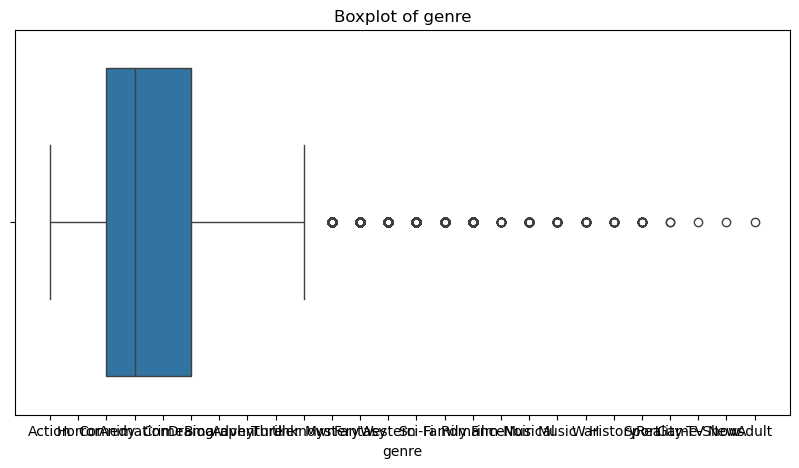

In [156]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['genre'])
plt.title('Boxplot of genre')
plt.xlabel('genre')
plt.show()

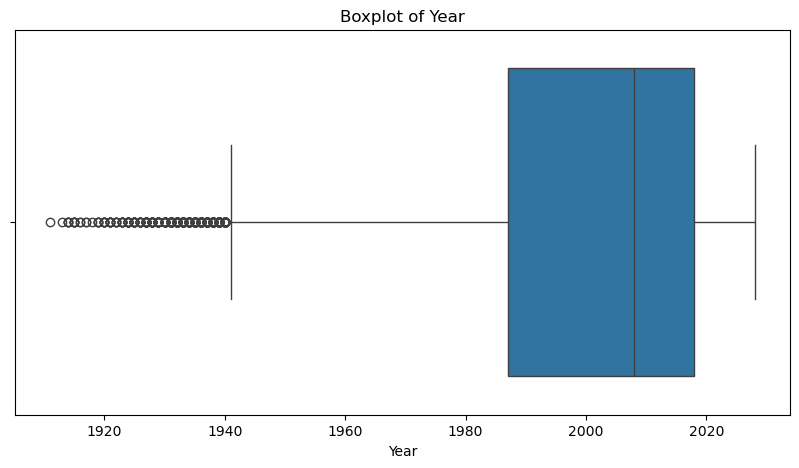

In [157]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Year'])
plt.title('Boxplot of Year')
plt.xlabel('Year')
plt.show()

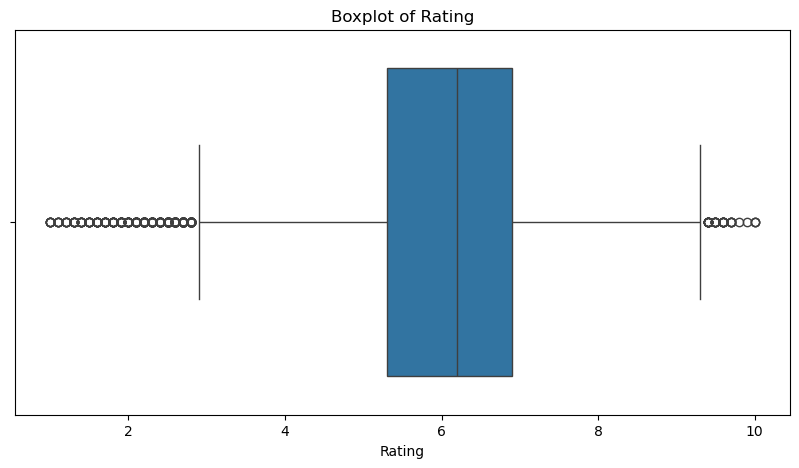

In [158]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Rating')
plt.xlabel('Rating')
plt.show()

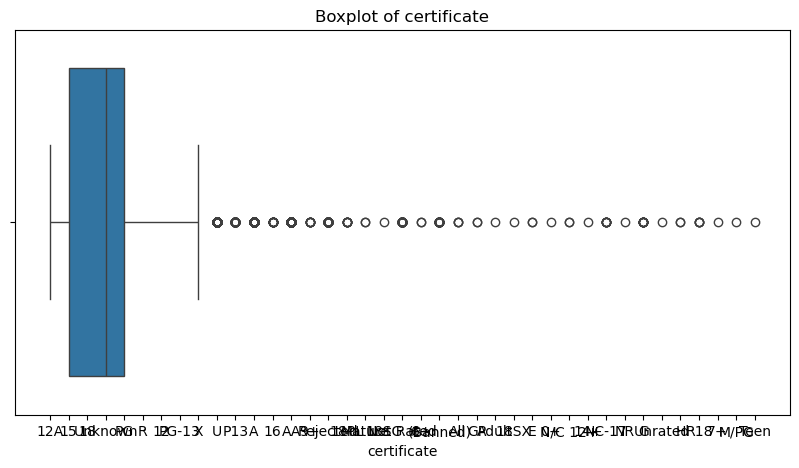

In [103]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['certificate'])
plt.title('Boxplot of certificate')
plt.xlabel('certificate')
plt.show()

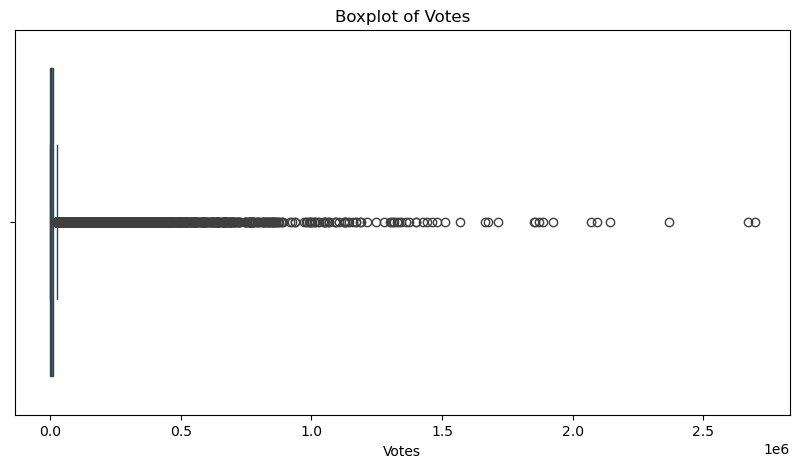

In [105]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Votes'])
plt.title('Boxplot of Votes')
plt.xlabel('Votes')
plt.show()

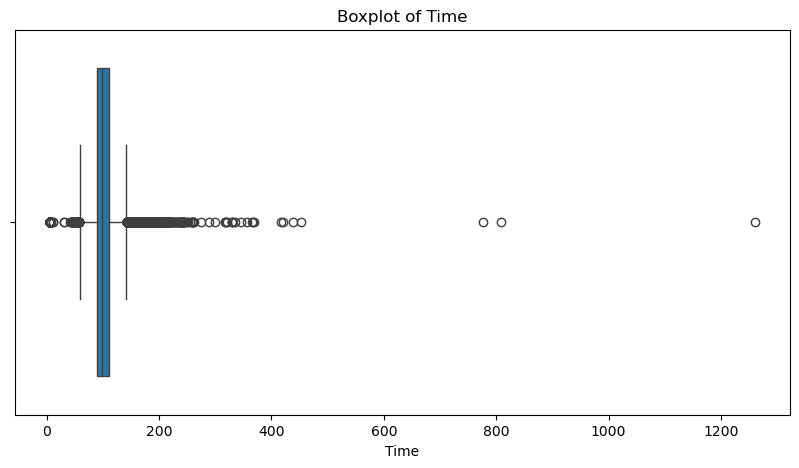

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Time'])
plt.title('Boxplot of Time')
plt.xlabel('Time')
plt.show()

In [112]:
## make a new clean file

In [114]:
df.to_csv('cleaned_movies.csv')